## Work
1. 試比較有 BN 在 Batch_size = 2, 16, 32, 128, 256 下的差異
2. 請嘗試將 BN 放在 Activation 之前，並比較訓練結果
3. 請於 BN 放在 Input Layer 後，並比較結果

In [1]:

import tensorflow as tf
gpus = tf.config.experimental.list_physical_devices(device_type='GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)
import os
import keras
import itertools
from keras.layers import BatchNormalization, Activation

In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [5]:

def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    """Code Here
    建立你的神經網路
    """
    input_layer = keras.layers.Input(input_shape)
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(input_layer)
            x = BatchNormalization()(x)
        else:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(x)
            x = BatchNormalization()(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [6]:
"""Code Here
設定超參數
"""
LEARNING_RATE = 1e-3
EPOCHS = 50
BATCH_SIZE = [16, 32, 128, 256]
MOMENTUM = 0.95

In [7]:
results = {}
"""Code Here
撰寫你的訓練流程並將結果用 dictionary 紀錄
"""
for BS in BATCH_SIZE:
    keras.backend.clear_session() # 把舊的 Graph 清掉
    print("BATCH_SIZE: %.3s" % (BS))
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    optimizer = keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=True, momentum=MOMENTUM)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)
    model.fit(x_train, y_train,
              epochs=EPOCHS,
              batch_size=BS,
              validation_data=(x_test, y_test),
              #verbose=0,  #不顯示訓練過程
              shuffle=True)

    # Collect results
    exp_name_tag = ("BS-%.3s" % (BS))
    results[exp_name_tag] = {'train-loss': model.history.history["loss"],
                             'valid-loss': model.history.history["val_loss"],
                             'train-acc': model.history.history["accuracy"],
                             'valid-acc': model.history.history["val_accuracy"]}

BATCH_SIZE: 16
Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 3072)]            0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
batch_normalization (BatchNo (None, 512)               2048      
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
batch_normalization_1 (Batch (None, 256)               1024      
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
batch_normalization_2 (Batch (None, 128)      

3125/3125 [==============================] - 14s 4ms/step - loss: 1.1180 - accuracy: 0.6036 - val_loss: 1.4547 - val_accuracy: 0.5017
Epoch 48/50
3125/3125 [==============================] - 14s 4ms/step - loss: 1.1137 - accuracy: 0.6035 - val_loss: 1.3970 - val_accuracy: 0.5237
Epoch 49/50
3125/3125 [==============================] - 14s 4ms/step - loss: 1.1179 - accuracy: 0.6058 - val_loss: 1.4630 - val_accuracy: 0.5016
Epoch 50/50
3125/3125 [==============================] - 14s 4ms/step - loss: 1.0985 - accuracy: 0.6090 - val_loss: 1.4101 - val_accuracy: 0.5209
BATCH_SIZE: 32
Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 3072)]            0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
ba

Epoch 44/50
1563/1563 [==============================] - 7s 5ms/step - loss: 0.7930 - accuracy: 0.7192 - val_loss: 1.5757 - val_accuracy: 0.5079
Epoch 45/50
1563/1563 [==============================] - 7s 5ms/step - loss: 0.7828 - accuracy: 0.7195 - val_loss: 1.6758 - val_accuracy: 0.4916
Epoch 46/50
1563/1563 [==============================] - 8s 5ms/step - loss: 0.7846 - accuracy: 0.7200 - val_loss: 1.6080 - val_accuracy: 0.5071
Epoch 47/50
1563/1563 [==============================] - 7s 5ms/step - loss: 0.7724 - accuracy: 0.7253 - val_loss: 1.5929 - val_accuracy: 0.5165
Epoch 48/50
1563/1563 [==============================] - 8s 5ms/step - loss: 0.7600 - accuracy: 0.7316 - val_loss: 1.5352 - val_accuracy: 0.5197
Epoch 49/50
1563/1563 [==============================] - 7s 5ms/step - loss: 0.7536 - accuracy: 0.7299 - val_loss: 1.6195 - val_accuracy: 0.5017
Epoch 50/50
1563/1563 [==============================] - 7s 5ms/step - loss: 0.7509 - accuracy: 0.7308 - val_loss: 1.6607 - val_ac

391/391 [==============================] - 2s 5ms/step - loss: 0.3400 - accuracy: 0.8849 - val_loss: 2.2744 - val_accuracy: 0.4615
Epoch 42/50
391/391 [==============================] - 2s 6ms/step - loss: 0.3247 - accuracy: 0.8918 - val_loss: 2.4299 - val_accuracy: 0.4440
Epoch 43/50
391/391 [==============================] - 2s 6ms/step - loss: 0.3020 - accuracy: 0.9003 - val_loss: 2.3265 - val_accuracy: 0.4629
Epoch 44/50
391/391 [==============================] - 2s 6ms/step - loss: 0.3094 - accuracy: 0.8942 - val_loss: 2.3481 - val_accuracy: 0.4763
Epoch 45/50
391/391 [==============================] - 2s 6ms/step - loss: 0.2869 - accuracy: 0.9032 - val_loss: 2.4123 - val_accuracy: 0.4654
Epoch 46/50
391/391 [==============================] - 2s 6ms/step - loss: 0.2845 - accuracy: 0.9048 - val_loss: 2.3709 - val_accuracy: 0.4674
Epoch 47/50
391/391 [==============================] - 2s 6ms/step - loss: 0.2767 - accuracy: 0.9068 - val_loss: 2.4163 - val_accuracy: 0.4694
Epoch 48/50

196/196 [==============================] - 1s 6ms/step - loss: 0.3078 - accuracy: 0.9077 - val_loss: 2.0797 - val_accuracy: 0.4762
Epoch 39/50
196/196 [==============================] - 1s 6ms/step - loss: 0.2946 - accuracy: 0.9122 - val_loss: 2.4185 - val_accuracy: 0.4606
Epoch 40/50
196/196 [==============================] - 1s 6ms/step - loss: 0.2879 - accuracy: 0.9156 - val_loss: 2.2140 - val_accuracy: 0.4719
Epoch 41/50
196/196 [==============================] - 1s 6ms/step - loss: 0.2732 - accuracy: 0.9191 - val_loss: 2.1697 - val_accuracy: 0.4615
Epoch 42/50
196/196 [==============================] - 1s 6ms/step - loss: 0.2549 - accuracy: 0.9258 - val_loss: 2.2701 - val_accuracy: 0.4770
Epoch 43/50
196/196 [==============================] - 1s 7ms/step - loss: 0.2406 - accuracy: 0.9318 - val_loss: 2.2113 - val_accuracy: 0.4655
Epoch 44/50
196/196 [==============================] - 1s 6ms/step - loss: 0.2273 - accuracy: 0.9357 - val_loss: 2.1935 - val_accuracy: 0.4791
Epoch 45/50

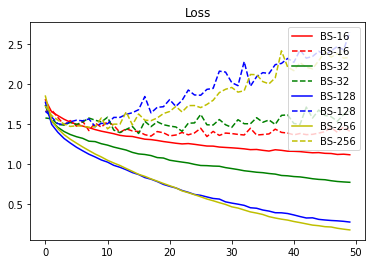

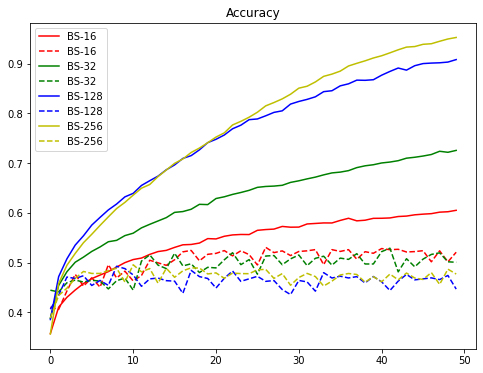

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline
"""Code Here
將結果繪出
"""
color_bar = ["r", "g", "b", "y", "m", "k"]
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()


In [9]:
# 請嘗試將 BN 放在 Activation 之前，並比較訓練結果
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, 
                                   name="hidden_layer"+str(i+1))(input_layer)
            x = BatchNormalization()(x)
            x = keras.layers.Activation('relu')(x)
        else:
            x = keras.layers.Dense(units=n_units, 
                                   name="hidden_layer"+str(i+1))(x)
            x = BatchNormalization()(x)
            x = keras.layers.Activation('relu')(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model
## 超參數設定
LEARNING_RATE = 1e-3
EPOCHS = 50
BATCH_SIZE = 1024
MOMENTUM = 0.95

keras.backend.clear_session() # 把舊的 Graph 清掉
model = build_mlp(input_shape=x_train.shape[1:])
model.summary()
optimizer = keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=True, momentum=MOMENTUM)
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

model.fit(x_train, y_train, 
          epochs=EPOCHS, 
          batch_size=BATCH_SIZE, 
          validation_data=(x_test, y_test), 
          shuffle=True)

# Collect results
train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]
train_acc = model.history.history["accuracy"]
valid_acc = model.history.history["val_accuracy"]

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 3072)]            0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
batch_normalization (BatchNo (None, 512)               2048      
_________________________________________________________________
activation (Activation)      (None, 512)               0         
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
batch_normalization_1 (Batch (None, 256)               1024      
_________________________________________________________________
activation_1 (Activation)    (None, 256)               0     

Epoch 46/50
49/49 [==============================] - 1s 11ms/step - loss: 0.5989 - accuracy: 0.8290 - val_loss: 1.5260 - val_accuracy: 0.5053
Epoch 47/50
49/49 [==============================] - 1s 11ms/step - loss: 0.5865 - accuracy: 0.8340 - val_loss: 1.5305 - val_accuracy: 0.5002
Epoch 48/50
49/49 [==============================] - 1s 11ms/step - loss: 0.5668 - accuracy: 0.8410 - val_loss: 1.5383 - val_accuracy: 0.5043
Epoch 49/50
49/49 [==============================] - 1s 11ms/step - loss: 0.5493 - accuracy: 0.8508 - val_loss: 1.5431 - val_accuracy: 0.5090
Epoch 50/50
49/49 [==============================] - 1s 11ms/step - loss: 0.5231 - accuracy: 0.8608 - val_loss: 1.5522 - val_accuracy: 0.5036


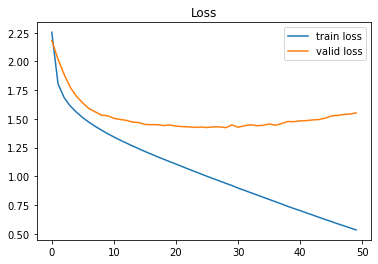

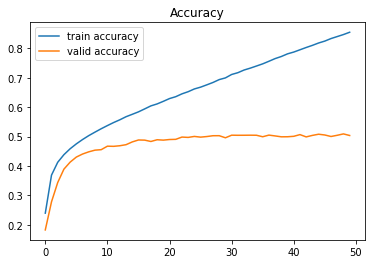

In [10]:

import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 3072)]            0         
_________________________________________________________________
batch_normalization (BatchNo (None, 3072)              12288     
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,751,178
Trainable params: 1,745,034
Non-trainable params: 6,144
_______________________________________________

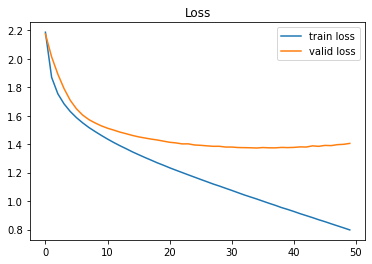

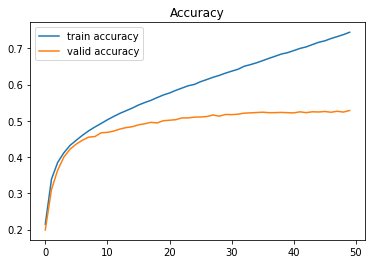

In [11]:
# 請於 BN 放在 Input Layer 後，並比較結果
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    input_layer = keras.layers.Input(input_shape)
    x = BatchNormalization()(input_layer)
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(x)
        else:

            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model
## 超參數設定
LEARNING_RATE = 1e-3
EPOCHS = 50
BATCH_SIZE = 1024
MOMENTUM = 0.95


keras.backend.clear_session() # 把舊的 Graph 清掉
model = build_mlp(input_shape=x_train.shape[1:])
model.summary()
optimizer = keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=True, momentum=MOMENTUM)
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

model.fit(x_train, y_train, 
          epochs=EPOCHS, 
          batch_size=BATCH_SIZE, 
          validation_data=(x_test, y_test), 
          shuffle=True)

# Collect results
train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]
train_acc = model.history.history["accuracy"]
valid_acc = model.history.history["val_accuracy"]

import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()